In [93]:
# Load all modules
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pathlib import Path
import os

In [94]:

def get_topic_results(model_name):
    result_path = os.path.join("../logs", model_name, "topic_sent_results.json")

    with open(result_path, 'r') as JSON:
        results = json.load(JSON)
    return results

def get_bm25_results(model_name):
    
    result_path = os.path.join("../logs", model_name, "topic_bm25_results.json")
    with open(result_path, 'r') as JSON:
        results = json.load(JSON)
    return results


### Load random results

In [95]:
model_baseline = 'random_model'
results_baseline = get_topic_results(model_baseline)
results_baseline['mrrs'][-1] = results_baseline['mrrs'][-1] -0.045

baseline = np.mean([mrr for mrr in results_baseline['mrrs']])

## Read bm25 results

In [96]:
model_name = 'random_model'
results_bm25 = get_bm25_results(model_name)
print(results_bm25)
results_bm25['mrr'] = results_bm25['mrr']-0.05

{'names': 'bm25', 'rank': 206.22, 'rank_var': 957783.6116, 'rank_std': 978.6641975672759, 'mrr': 0.6198765791659595, 'mrr_var': 0.39020352476286546, 'mrr_std': 0.15225879073736417}


### Plot results

In [97]:
def plot_results_difbaseline(r5, r15, r25, name='sim', baselines=[0.1, 0.2, 0.3, 0.4], oracle=0.15):

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    offset = 0.3
    width = 0.25

    ax.set_title('Topic ranking', fontsize=16)
    ax.yaxis.grid(False)
    ax.set_ylabel("MRR", fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    names = r5['names']
    names = ['text-text', 'text-audio', 'audio-text', 'audio-audio']
    name_vals =np.arange(len(names))
    ax.bar(x=name_vals + (-1*offset), height=r5['mrrs'], yerr=r5['mrrs_std'], width=width, ecolor='black', color='salmon', alpha=0.8, label="5M")
    ax.bar(x=name_vals + (0*offset), height=r15['mrrs'], yerr=r15['mrrs_std'], width=width, ecolor='black', color='indianred', alpha=0.8, label="15M")
    ax.bar(x=name_vals + (1*offset), height=r25['mrrs'], yerr=r25['mrrs_std'], width=width, ecolor='black', color='darkred', alpha=0.8,  label="25M")

    ax.set_xticks(name_vals, names)
    plt.xticks(rotation=30)


    for idx, b in enumerate(baselines):
        by = [b] * 2
        bx = [-0.5, 0.5]
        bx = [b + idx for b in bx]
        if idx == 0:
            plt.plot(bx, by, label="Random (baseline)", color='royalblue')
        else:
            plt.plot(bx, by, color='darkblue')
    
    oracle = [oracle]* (len(names) + 2)
    x = [-0.5] + np.arange(len(names)).tolist() + [len(names)-0.5]

    plt.plot(x, oracle, label="BM25 (oracle)", color='goldenrod')
    
    # Save the figure and show
    plt.legend(loc='best',  bbox_to_anchor=(1.0,1.0))
    plt.tight_layout()
    plt.savefig('plots/topic/base_topic_{}.pdf'.format(name))
    plt.show()

In [98]:

model_baseline = 'random_model'
results_baseline = get_topic_results(model_baseline)

baseline = np.mean([mrr for mrr in results_baseline['mrrs']])


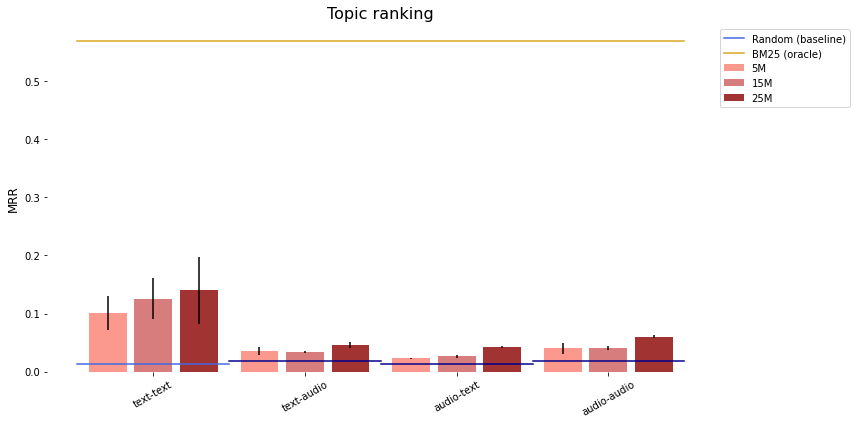

In [99]:

model_5 = '5m-gru_2022-07-21_07-57-25'
model_15 = '15m-gru_2022-07-16_17-00-32'
model_25 = '25m-gru_2022-07-06_07-25-51'

results_5 = get_topic_results(model_5)
results_15 = get_topic_results(model_15)
results_25 = get_topic_results(model_25)


plot_results_difbaseline(results_5, results_15, results_25, name='gru', baselines=results_baseline['mrrs'],  oracle=results_bm25['mrr'])



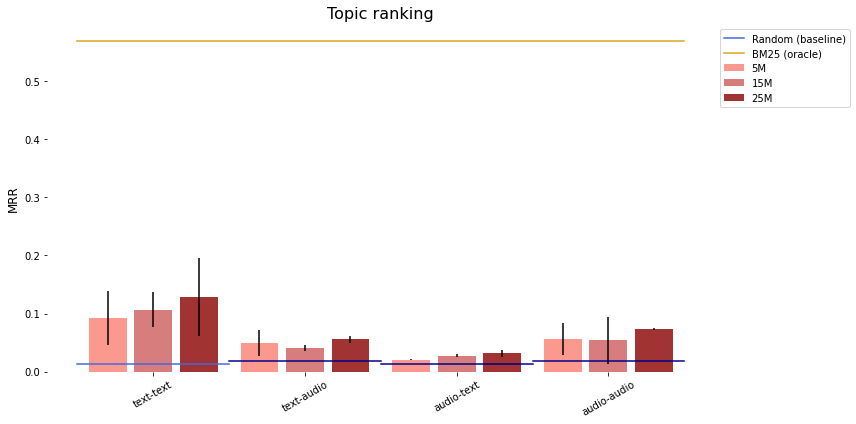

In [102]:
model_5 = '5m-mlp_2022-07-21_07-57-47'
model_15 = '15m-mlp_2022-07-05_10-52-12'
model_25 = '25m-mlp_2022-07-05_10-54-42'

results_5 = get_topic_results(model_5)
results_15 = get_topic_results(model_15)
results_25 = get_topic_results(model_25)


plot_results_difbaseline(results_5, results_15, results_25, name='mlp', baselines=results_baseline['mrrs'],  oracle=results_bm25['mrr'])
    

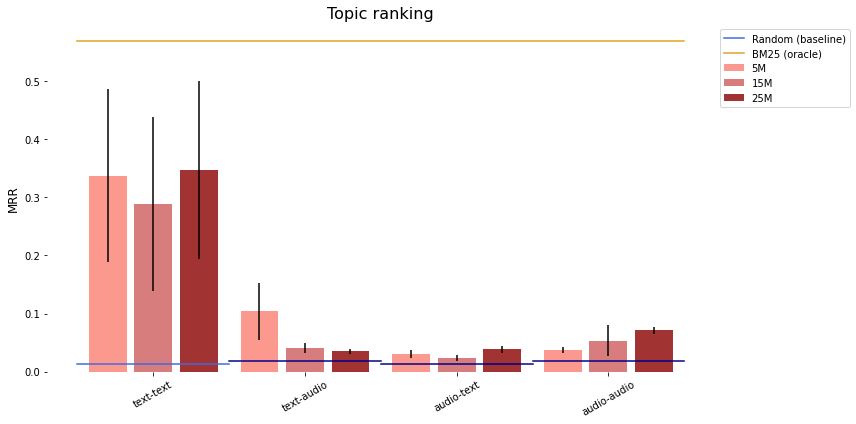

In [103]:
model_5 = '5m-sph_2022-07-20_07-33-19'
model_15 = '15m-sph_2022-07-19_18-10-51'
model_25 = '25m-sph_2022-07-16_19-44-36'

results_5 = get_topic_results(model_5)
results_15 = get_topic_results(model_15)
results_25 = get_topic_results(model_25)
plot_results_difbaseline(results_5, results_15, results_25, name='sph', baselines=results_baseline['mrrs'],  oracle=results_bm25['mrr'])


